In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #to plot graphs
sns.set()  #setting seaborn as default

DataSet = pd.read_csv("WFH_WFO_dataset.csv")
DataSet

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
203,204,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
204,205,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0
205,206,Radha,25,Marketing,Female,No,Yes,Yes,No,No,STRESSED,5,3,5,Yes,1,3,No,0


In [ ]:
#checking the data types of the data frame
DataSet.dtypes

ID                              int64
Name                           object
Age                             int64
Occupation                     object
Gender                         object
Same_ofiice_home_location      object
kids                           object
RM_save_money                  object
RM_quality_time                object
RM_better_sleep                object
calmer_stressed                object
RM_professional_growth          int64
RM_lazy                         int64
RM_productive                   int64
digital_connect_sufficient     object
RM_better_work_life_balance     int64
RM_improved_skillset            int64
RM_job_opportunities           object
Target                          int64
dtype: object

In [ ]:
#Checking out for missing values
DataSet.isnull().sum()

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_ofiice_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

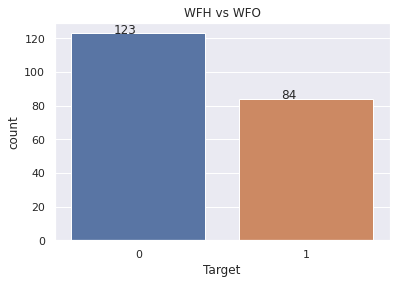

In [ ]:
#Visualizing the target variable. Checking if the dataset is balanced to decide if we need balancing techniques to train the models
ax=sns.countplot(x='Target',data=DataSet)
plt.title('WFH vs WFO')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

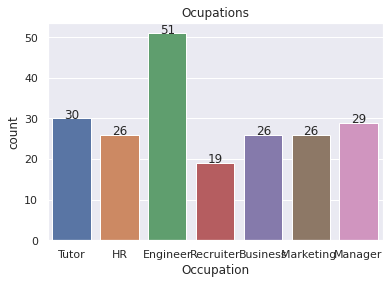

In [ ]:
#Visualizing some predictors to create initial findings.
#Occupation may be important variable to look at
ax=sns.countplot(x='Occupation',data=DataSet)
plt.title('Ocupations')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

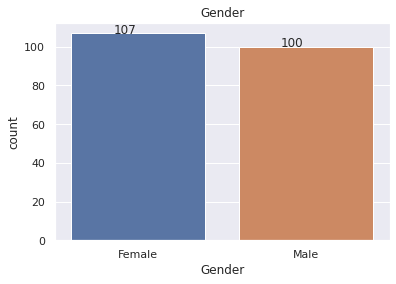

In [ ]:
#Plotting gender split in the dataset. Gender may impact preferences
ax=sns.countplot(x='Gender',data=DataSet)
plt.title('Gender')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

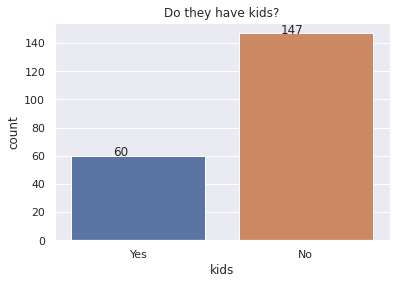

In [ ]:
#Plotting to the question "Do you have kids?"
#Having kids may be an important feature because we assume parents may want to care for their children
ax=sns.countplot(x='kids',data=DataSet)
plt.title('Do they have kids?')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

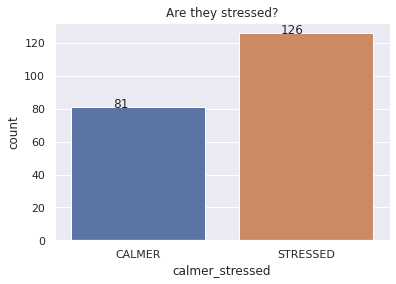

In [ ]:
#Plotting stress.
#will stressful environments have a huge impact?
ax=sns.countplot(x='calmer_stressed',data=DataSet)
plt.title('Are they stressed?')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

In [ ]:
#Encoding and creating dummy variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

Preprocess = DataSet
categorical = Preprocess.dtypes == object
categorical

ID                             False
Name                            True
Age                            False
Occupation                      True
Gender                          True
Same_ofiice_home_location       True
kids                            True
RM_save_money                   True
RM_quality_time                 True
RM_better_sleep                 True
calmer_stressed                 True
RM_professional_growth         False
RM_lazy                        False
RM_productive                  False
digital_connect_sufficient      True
RM_better_work_life_balance    False
RM_improved_skillset           False
RM_job_opportunities            True
Target                         False
dtype: bool

In [ ]:
gender=pd.get_dummies(Preprocess['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,1
2,0
3,0
4,1


In [ ]:
calm_stress=pd.get_dummies(Preprocess['calmer_stressed'],drop_first=True)
calm_stress.head()

,STRESSED
0,0
1,0
2,0
3,1
4,1


In [ ]:
#concatenating the dummy variables Male and STRESSED into the dataset and replacing Gender and calmer_stressed with the dummies
Preprocess=pd.concat([Preprocess,gender,calm_stress],axis=1)
Preprocess.drop(['Gender','calmer_stressed'],axis=1,inplace=True)

In [ ]:
Preprocess

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,Yes,Yes,Yes,Yes,Yes,5,1,5,Yes,5,5,Yes,1,0,0
1,2,Harry,24,Tutor,No,No,No,No,No,2,2,2,No,3,3,No,1,1,0
2,3,Banditaa,53,HR,Yes,Yes,Yes,Yes,Yes,3,3,4,No,5,3,No,1,0,0
3,4,Neetha,26,Engineer,Yes,No,Yes,Yes,No,3,4,4,No,4,5,Yes,0,0,1
4,5,Ram,26,Recruiter,Yes,No,No,Yes,No,3,3,5,Yes,4,2,Yes,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,Nandini,32,Engineer,Yes,Yes,Yes,Yes,Yes,4,1,5,Yes,3,3,Not sure,1,0,0
203,204,Matt,52,Business,Yes,Yes,Yes,Yes,Yes,4,4,4,Yes,5,3,No,1,1,0
204,205,Rithik,22,Marketing,Yes,No,Yes,Yes,No,4,4,4,No,4,3,Not sure,0,1,1
205,206,Radha,25,Marketing,No,Yes,Yes,No,No,5,3,5,Yes,1,3,No,0,0,1


In [ ]:
#Creating a function to map Yes or No answers and replacing them with 1s and 0s
categorical =  ['Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# now replace yes and no with 1 and 0 in our dataset
Preprocess[categorical] = Preprocess[categorical].apply(binary_map)
Preprocess.head(10)

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,1.0,1,1,1,1,5,1,5,1,5,5,1.0,1,0,0
1,2,Harry,24,Tutor,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,1,0
2,3,Banditaa,53,HR,1.0,1,1,1,1,3,3,4,0,5,3,0.0,1,0,0
3,4,Neetha,26,Engineer,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,0,1
4,5,Ram,26,Recruiter,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1,1
5,6,Gaurav,27,Recruiter,0.0,0,1,1,1,3,3,3,0,3,5,1.0,0,1,0
6,7,Sandy,24,Engineer,1.0,0,0,0,0,3,4,2,0,2,3,NaN,1,1,0
7,8,Gina,36,Engineer,0.0,0,0,1,0,3,4,3,0,3,4,NaN,0,0,1
8,9,Ray,26,Engineer,0.0,0,1,1,1,2,4,3,0,2,4,NaN,0,1,1
9,10,Ganika,26,Recruiter,0.0,0,1,1,1,3,2,4,0,4,3,NaN,1,0,0


In [ ]:
#Checking for null values again after dummies and mapping is done
Preprocess.isnull().sum()

ID                              0
Name                            0
Age                             0
Occupation                      0
Same_ofiice_home_location       1
kids                            0
RM_save_money                   0
RM_quality_time                 0
RM_better_sleep                 0
RM_professional_growth          0
RM_lazy                         0
RM_productive                   0
digital_connect_sufficient      0
RM_better_work_life_balance     0
RM_improved_skillset            0
RM_job_opportunities           87
Target                          0
Male                            0
STRESSED                        0
dtype: int64

In [ ]:
#Filling null values with the number 2. After looking more into the dataset there was a third option "Not Sure"
#2 will represent the "Not Sure" responsed from the survey
Preprocess = Preprocess.fillna(2)
#Checking out the unique categorical values in the occupation column to properly encode them
print (Preprocess['Occupation'].unique())


['Tutor' 'HR' 'Engineer' 'Recruiter' 'Business' 'Marketing ' 'Manager']


In [ ]:
#Creating a funtion that will encode the occupations
var = ['Occupation']

def occupation_map(x):
    return x.map({'Tutor':1, 'HR':2, 'Engineer':3, 'Recruiter':4, 'Business':5, 'Marketing ':6, 'Manager':7})

#applying the function into the dataset to encode the values
Preprocess[var] = Preprocess[var].apply(occupation_map)
Preprocess.head(10)

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,1,1.0,1,1,1,1,5,1,5,1,5,5,1.0,1,0,0
1,2,Harry,24,1,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,1,0
2,3,Banditaa,53,2,1.0,1,1,1,1,3,3,4,0,5,3,0.0,1,0,0
3,4,Neetha,26,3,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,0,1
4,5,Ram,26,4,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1,1
5,6,Gaurav,27,4,0.0,0,1,1,1,3,3,3,0,3,5,1.0,0,1,0
6,7,Sandy,24,3,1.0,0,0,0,0,3,4,2,0,2,3,2.0,1,1,0
7,8,Gina,36,3,0.0,0,0,1,0,3,4,3,0,3,4,2.0,0,0,1
8,9,Ray,26,3,0.0,0,1,1,1,2,4,3,0,2,4,2.0,0,1,1
9,10,Ganika,26,4,0.0,0,1,1,1,3,2,4,0,4,3,2.0,1,0,0


In [ ]:
#dropping ID and Name columns because they are irrelevant to our models
Preprocess = Preprocess.drop(['ID','Name'], axis =1)

In [ ]:
Preprocess.head()

,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,45,1,1.0,1,1,1,1,5,1,5,1,5,5,1.0,1,0,0
1,24,1,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,1,0
2,53,2,1.0,1,1,1,1,3,3,4,0,5,3,0.0,1,0,0
3,26,3,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,0,1
4,26,4,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1,1


In [ ]:
#double checking if encoding was done properly
print (Preprocess['Occupation'].unique())

[1 2 3 4 5 6 7]


In [ ]:
#separating the data from the target variable
X = Preprocess.loc[:, Preprocess.columns != 'Target']
y = Preprocess['Target']
X.head()

,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Male,STRESSED
0,45,1,1.0,1,1,1,1,5,1,5,1,5,5,1.0,0,0
1,24,1,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,0
2,53,2,1.0,1,1,1,1,3,3,4,0,5,3,0.0,0,0
3,26,3,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,1
4,26,4,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1


In [ ]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Target, dtype: int64

In [ ]:
#creating a variable to keep the name of the features for further visualization of feature importance for evaluation of the models
X_feature_names = X.columns

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)
Scaled_X

array([[ 1.80680822, -1.44622102,  0.94855999, ..., -0.26270532,
        -0.96673649, -1.24721913],
       [-0.66773347, -1.44622102, -1.01495919, ..., -1.55746725,
         1.03440804, -1.24721913],
       [ 2.74949077, -0.94138502,  0.94855999, ..., -1.55746725,
        -0.96673649, -1.24721913],
       ...,
       [-0.90340411,  1.07795901,  0.94855999, ...,  1.03205661,
         1.03440804,  0.80178373],
       [-0.54989815,  1.07795901, -1.01495919, ..., -1.55746725,
        -0.96673649,  0.80178373],
       [-0.78556879, -1.44622102, -1.01495919, ..., -1.55746725,
        -0.96673649, -1.24721913]])

In [ ]:
#creating the data split. By default the data is split into 75/25 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
Scaled_X_train, Scaled_X_test, Scaled_y_train, Scaled_y_test = train_test_split(
    Scaled_X, y, random_state=0)

In [ ]:
#modeling and training K nearest neighbors model with NO scaling
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)

#checking for accuary for the training set with NO scaling
knr.score(X_train, y_train)

0.6951345755693581

In [ ]:
#modeling and training K nearest neighbors model with scaling
Scaledknr = KNeighborsRegressor().fit(Scaled_X_train,Scaled_y_train)
#Checking for accuracy on the train set with scaling
Scaledknr.score(Scaled_X_train,Scaled_y_train)

0.78391994478951

In [ ]:
#Checking the accuracy on the validation set with NO scaling
knr.score(X_test, y_test)

0.4855913978494625

In [ ]:
#Checking the accuracy on the validation set with scaling
Scaledknr.score(Scaled_X_test,Scaled_y_test)

0.4760061443932412

In [ ]:
#Creating and training a logistic regression model
from sklearn.linear_model import LogisticRegression

#model with NO scaling done
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#model with scaling
scaledclf = LogisticRegression(random_state=0).fit(Scaled_X_train, Scaled_y_train)

#Accuracy on the training set with NO scaling
clf.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.896774193548387

In [ ]:
#Accuracy on the validation data set with NO scaling
clf.score(X_test, y_test)

0.75

In [ ]:
#Accuracy on the training set with scaling
scaledclf.score(Scaled_X_train, Scaled_y_train)

0.9741935483870968

In [ ]:
#Accuracy on the validation set with scaling
scaledclf.score(Scaled_X_test, Scaled_y_test)

0.8461538461538461

In [ ]:
#Modeling and training an ensemble model using Gradient Boost
#the previous models were weak learners judging by their performance.
#The models need more data and we are data starved due to the number of records available in the data set.
#Because of this we need to apply Boosting methods to improve the performance of the model
from sklearn.ensemble import GradientBoostingClassifier

Boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=2, random_state=0).fit(X_train, y_train)
#Accuracy on the training set
Boosting.score(X_train, y_train)

1.0

In [ ]:
#Accuracy on the validation set
Boosting.score(X_test, y_test)

0.9807692307692307

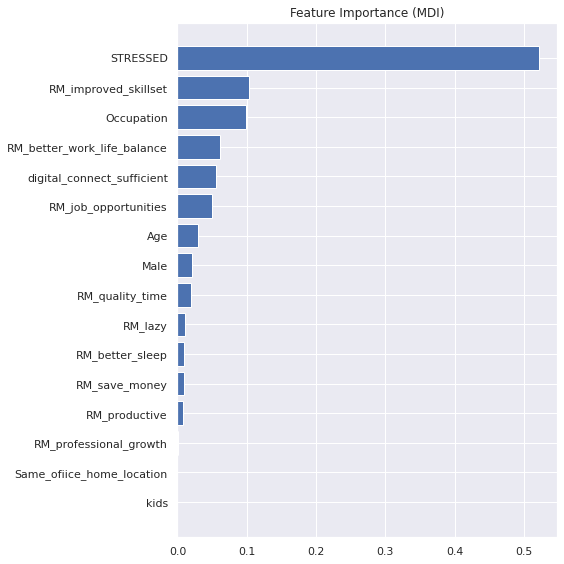

In [ ]:
#The model with boosting performed the best with great results making it the best model to use for our dataset
#Checking the feature importance of the boosted model
from sklearn.inspection import permutation_importance
feature_importance = Boosting.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(Boosting, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()